<a href="https://colab.research.google.com/github/Shakshi3104/isJohnnys/blob/master/JohnnyFace_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ZIPファイルを展開

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip /content/drive/My\ Drive/データマイニング/2019/face.zip

Archive:  /content/drive/My Drive/データマイニング/2019/face.zip
   creating: face/
  inflating: __MACOSX/._face         
  inflating: face/.DS_Store          
  inflating: __MACOSX/face/._.DS_Store  
   creating: face/others/
   creating: face/johnnys/
   creating: face/others/赤楚衛二/
   creating: face/others/菅田将暉/
   creating: face/others/田中圭/
   creating: face/others/志尊淳/
   creating: face/others/千葉雄大/
   creating: face/others/岡田龍太郎/
   creating: face/others/綾野剛/
   creating: face/others/北村匠海/
   creating: face/others/飯島颯/
   creating: face/others/登坂広臣/
  inflating: __MACOSX/face/others/._登坂広臣  
   creating: face/others/関口メンディー/
  inflating: face/others/.DS_Store   
  inflating: __MACOSX/face/others/._.DS_Store  
   creating: face/others/板垣瑞生/
   creating: face/others/福士蒼汰/
   creating: face/others/桐山漣/
   creating: face/others/吉田仁人/
   creating: face/others/西岡健吾/
   creating: face/others/今市隆二/
  inflating: __MACOSX/face/others/._今市隆二  
   creating: face/others/永田薫/
   creating: face/others/竹

# コードの読み込み

In [0]:
!rm -R isJohnnys*
!git clone https://github.com/Shakshi3104/isJohnnys.git

rm: cannot remove 'isJohnnys*': No such file or directory
Cloning into 'isJohnnys'...
remote: Enumerating objects: 230, done.
remote: Counting objects: 100% (230/230), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 230 (delta 97), reused 190 (delta 59), pack-reused 0
Receiving objects: 100% (230/230), 34.50 KiB | 6.90 MiB/s, done.
Resolving deltas: 100% (97/97), done.


In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
import sys

sys.path.append("/content/isJohnnys")

In [0]:
import numpy as np
import pandas as pd

#  画像を読み込む

In [0]:
from images.dataset import Dataset

In [0]:
input_dir = "/content/face/"
dataset = Dataset(input_dir=input_dir, colab=True)
images, labels, detail_labels = dataset.load_data()

/content/face/johnnys/櫻井翔/img_32.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_0.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_55.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_11.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_2.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_14.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_58.png
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_8.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_42.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_31.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_15.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_97.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_88.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_49.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_48.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_75.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_25.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_26.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_40.jpg
(64, 64, 3)
/content/face/johnnys/櫻井翔/img_47.jpg
(64, 64, 3)
/content/face/johnnys/櫻

In [0]:
print("shape", images.shape)
print("Johnnys Images", dataset.johnnys_image_num)
print("Others Images", dataset.others_image_num)

shape (7541, 64, 64, 3)
Johnnys Images 3596
Others Images 3945


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

## one-hot vector

In [0]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test_ = to_categorical(y_test, 2)

print(x_train.shape)
print(y_test_.shape)

(6032, 64, 64, 3)
(1509, 2)


# 重みを固定するブロック数を変える

In [0]:
from networks.models import VGG, pretrained_VGG
from tensorflow.keras.optimizers import Adam
from networks.training import plot_history

In [0]:
output_dir = "/content/drive/My Drive/データマイニング/2019/models/"

In [0]:
def training(frozen_block_num):
  # モデルを読み込む
  model = pretrained_VGG(weight_layer_num=16, 
                         frozen_block_num=frozen_block_num)
  model_name = "vgg16_imagenet_frozen_" + str(frozen_block_num)

  # コンパイル
  model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy',
                metrics=['accuracy'])
  
  # 学習
  stack = model.fit(x_train, y_train, epochs=100, batch_size=50, 
                  validation_data=(x_test, y_test_))
  
  score = model.evaluate(x_test, y_test_, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  plot_history(stack, filename=output_dir + "history_" + model_name + ".png")

  return score

In [0]:
losses = []
accs = []

Fine-tuning
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 1s 0us/step
layer 0 trainable: True
layer 1 trainable: True
layer 2 trainable: True
layer 3 trainable: True
layer 4 trainable: True
layer 5 trainable: True
layer 6 trainable: True
layer 7 trainable: True
layer 8 trainable: True
layer 9 trainable: True
layer 10 trainable: True
layer 11 trainable: True
layer 12 trainable: True
layer 13 trainable: True
layer 14 trainable: True
layer 15 trainable: True
layer 16 trainable: True
layer 17 trainable: True
layer 18 trainable: True
layer 19 trainable: True
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 6032 samples, validate on 1509 samples
Epoch 1/100
6032/6032 [==============================] - 20s 3ms/sample - loss: 0.7009 - acc: 0.4967 - val_loss: 0.6947 - val_acc: 0.4712
Epoch 2/100
6032/6032 [==============================] - 10s 2ms/sample 

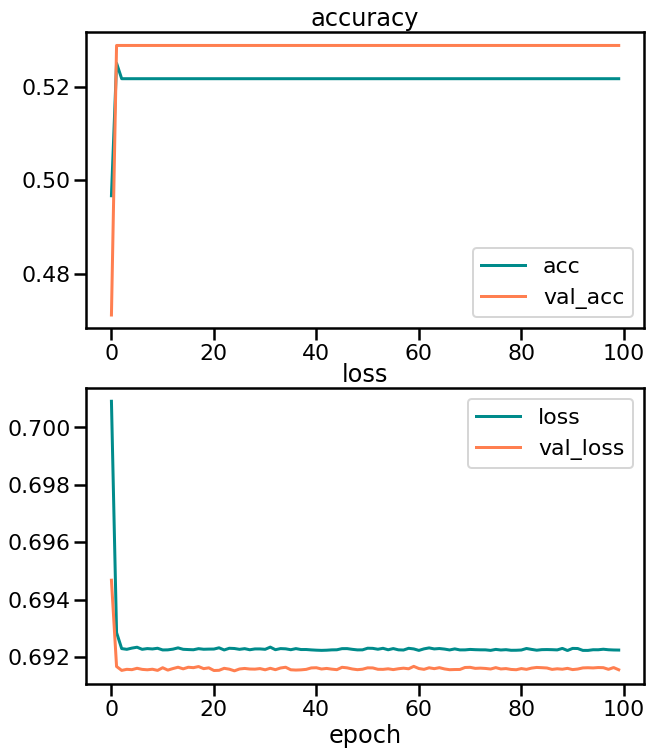

Frozen 1 - 1 ConvBlock
layer 0 trainable: False
layer 1 trainable: False
layer 2 trainable: False
layer 3 trainable: False
layer 4 trainable: True
layer 5 trainable: True
layer 6 trainable: True
layer 7 trainable: True
layer 8 trainable: True
layer 9 trainable: True
layer 10 trainable: True
layer 11 trainable: True
layer 12 trainable: True
layer 13 trainable: True
layer 14 trainable: True
layer 15 trainable: True
layer 16 trainable: True
layer 17 trainable: True
layer 18 trainable: True
layer 19 trainable: True
Train on 6032 samples, validate on 1509 samples
Epoch 1/100
6032/6032 [==============================] - 9s 2ms/sample - loss: 0.7014 - acc: 0.5091 - val_loss: 0.6935 - val_acc: 0.4765
Epoch 2/100
6032/6032 [==============================] - 9s 1ms/sample - loss: 0.6599 - acc: 0.6005 - val_loss: 0.6043 - val_acc: 0.6746
Epoch 3/100
6032/6032 [==============================] - 9s 1ms/sample - loss: 0.5993 - acc: 0.6767 - val_loss: 0.5486 - val_acc: 0.7237
Epoch 4/100
6032/6032 [=

<Figure size 432x288 with 0 Axes>

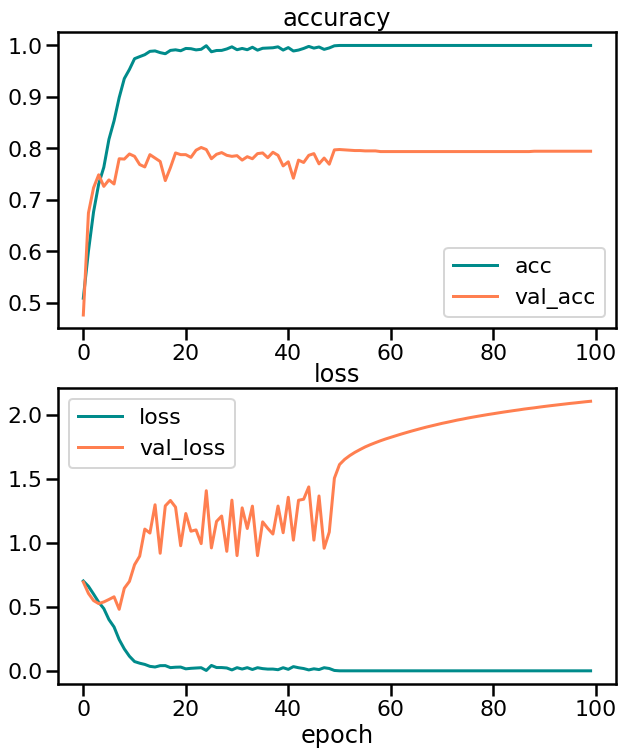

Frozen 1 - 2 ConvBlock
layer 0 trainable: False
layer 1 trainable: False
layer 2 trainable: False
layer 3 trainable: False
layer 4 trainable: False
layer 5 trainable: False
layer 6 trainable: False
layer 7 trainable: True
layer 8 trainable: True
layer 9 trainable: True
layer 10 trainable: True
layer 11 trainable: True
layer 12 trainable: True
layer 13 trainable: True
layer 14 trainable: True
layer 15 trainable: True
layer 16 trainable: True
layer 17 trainable: True
layer 18 trainable: True
layer 19 trainable: True
Train on 6032 samples, validate on 1509 samples
Epoch 1/100
6032/6032 [==============================] - 9s 1ms/sample - loss: 0.6928 - acc: 0.5424 - val_loss: 0.7014 - val_acc: 0.5288
Epoch 2/100
6032/6032 [==============================] - 8s 1ms/sample - loss: 0.6298 - acc: 0.6461 - val_loss: 0.5769 - val_acc: 0.7038
Epoch 3/100
6032/6032 [==============================] - 8s 1ms/sample - loss: 0.5686 - acc: 0.7097 - val_loss: 0.5471 - val_acc: 0.7250
Epoch 4/100
6032/6032

<Figure size 432x288 with 0 Axes>

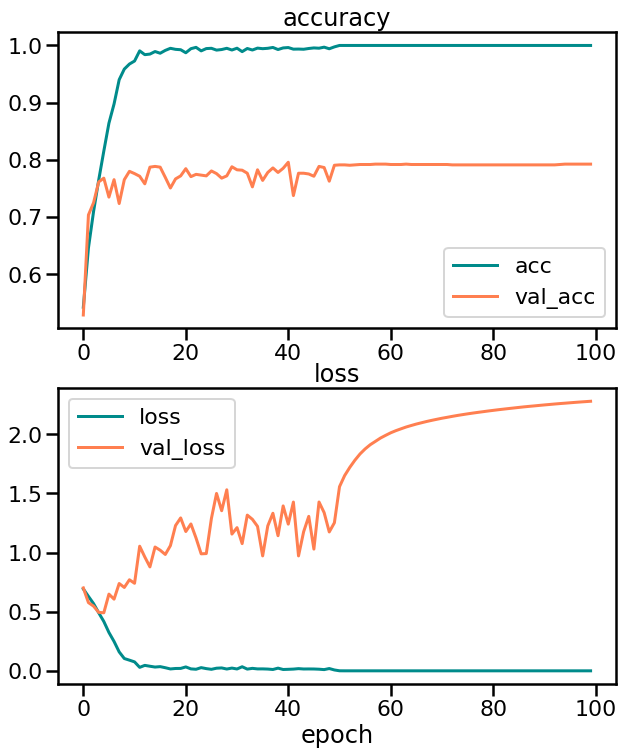

Frozen 1 - 3 ConvBlock
layer 0 trainable: False
layer 1 trainable: False
layer 2 trainable: False
layer 3 trainable: False
layer 4 trainable: False
layer 5 trainable: False
layer 6 trainable: False
layer 7 trainable: False
layer 8 trainable: False
layer 9 trainable: False
layer 10 trainable: False
layer 11 trainable: True
layer 12 trainable: True
layer 13 trainable: True
layer 14 trainable: True
layer 15 trainable: True
layer 16 trainable: True
layer 17 trainable: True
layer 18 trainable: True
layer 19 trainable: True
Train on 6032 samples, validate on 1509 samples
Epoch 1/100
6032/6032 [==============================] - 7s 1ms/sample - loss: 0.6928 - acc: 0.5343 - val_loss: 0.6772 - val_acc: 0.5719
Epoch 2/100
6032/6032 [==============================] - 7s 1ms/sample - loss: 0.6308 - acc: 0.6461 - val_loss: 0.6198 - val_acc: 0.6415
Epoch 3/100
6032/6032 [==============================] - 7s 1ms/sample - loss: 0.5473 - acc: 0.7205 - val_loss: 0.5430 - val_acc: 0.7290
Epoch 4/100
6032/

<Figure size 432x288 with 0 Axes>

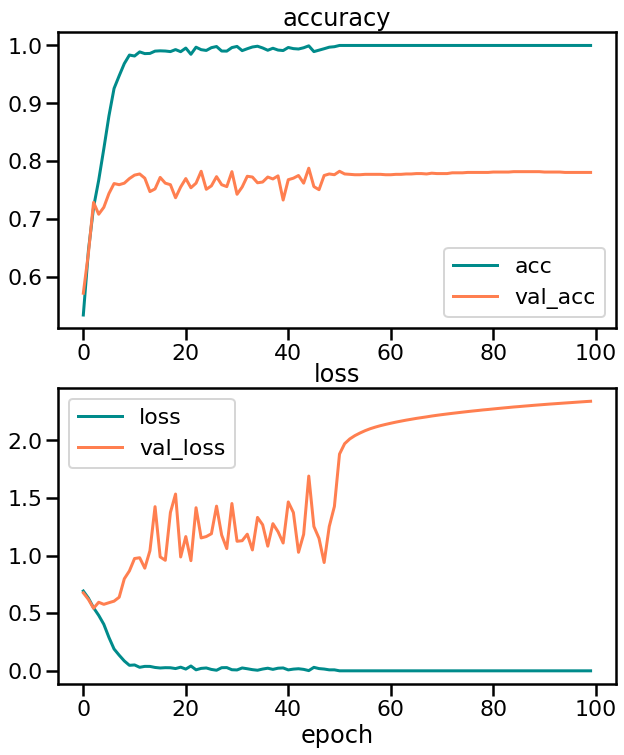

Frozen 1 - 4 ConvBlock
layer 0 trainable: False
layer 1 trainable: False
layer 2 trainable: False
layer 3 trainable: False
layer 4 trainable: False
layer 5 trainable: False
layer 6 trainable: False
layer 7 trainable: False
layer 8 trainable: False
layer 9 trainable: False
layer 10 trainable: False
layer 11 trainable: False
layer 12 trainable: False
layer 13 trainable: False
layer 14 trainable: False
layer 15 trainable: True
layer 16 trainable: True
layer 17 trainable: True
layer 18 trainable: True
layer 19 trainable: True
Train on 6032 samples, validate on 1509 samples
Epoch 1/100
6032/6032 [==============================] - 6s 1000us/sample - loss: 0.6784 - acc: 0.5698 - val_loss: 0.6654 - val_acc: 0.6342
Epoch 2/100
6032/6032 [==============================] - 5s 902us/sample - loss: 0.6068 - acc: 0.6679 - val_loss: 0.6154 - val_acc: 0.6713
Epoch 3/100
6032/6032 [==============================] - 5s 898us/sample - loss: 0.5443 - acc: 0.7246 - val_loss: 0.5658 - val_acc: 0.7031
Epoch 

<Figure size 432x288 with 0 Axes>

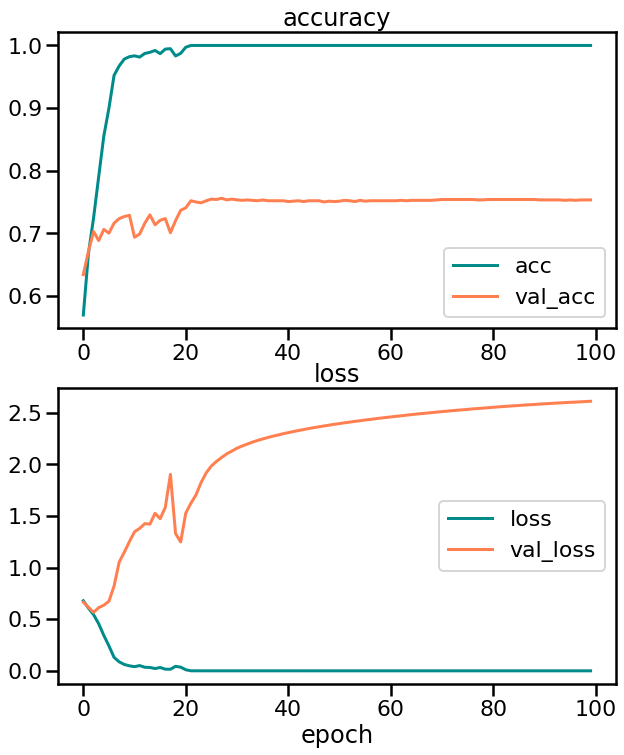

Frozen 1 - 5 ConvBlock
layer 0 trainable: False
layer 1 trainable: False
layer 2 trainable: False
layer 3 trainable: False
layer 4 trainable: False
layer 5 trainable: False
layer 6 trainable: False
layer 7 trainable: False
layer 8 trainable: False
layer 9 trainable: False
layer 10 trainable: False
layer 11 trainable: False
layer 12 trainable: False
layer 13 trainable: False
layer 14 trainable: False
layer 15 trainable: False
layer 16 trainable: False
layer 17 trainable: False
layer 18 trainable: False
layer 19 trainable: True
Train on 6032 samples, validate on 1509 samples
Epoch 1/100
6032/6032 [==============================] - 5s 843us/sample - loss: 0.6655 - acc: 0.6008 - val_loss: 0.6378 - val_acc: 0.6448
Epoch 2/100
6032/6032 [==============================] - 5s 750us/sample - loss: 0.6074 - acc: 0.6714 - val_loss: 0.6466 - val_acc: 0.6256
Epoch 3/100
6032/6032 [==============================] - 5s 748us/sample - loss: 0.5730 - acc: 0.7018 - val_loss: 0.6182 - val_acc: 0.6600
Epo

In [17]:
for i in range(0, 6):
  if i == 0:
    print("Fine-tuning")
  else:
    print("Frozen 1 - " + str(i) + " ConvBlock")
  score = training(frozen_block_num=i)
  losses += [score[0]]
  accs += [score[1]]

In [0]:
import pandas as pd

In [19]:
scores = pd.DataFrame({"loss": losses, "accuracy": accs})
scores

,loss,accuracy
0,0.691558,0.528827
1,2.104631,0.794566
2,2.280112,0.792578
3,2.340516,0.780649
4,2.610157,0.753479
5,2.196398,0.697150


In [0]:
scores.to_csv(output_dir + "scores.csv")